#  Machine learning model to predict passenger survival on the Titanic

## `Step 1: Get the data`

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline 

data = pd.read_csv('../data/train.csv')
data.shape

(891, 12)

## `Step 2: Exploratory data analysis` 
This step is in an additional notebook: __Exploratory_Data_Analysis_Titanic.ipynb__

## `Step 3. Feature engineering`

Using **feature engineering** approaches make the data easy to understand for a model. 
Variables that may properly describing your model and fitting to the data. 


In [3]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 3.1 One hot encoded features
* who (title)
* embarked
* Cabin

In [4]:
def cabin_names(dataframe, data_type):
    """
    Hoteconodes the cabin names

    Parameters:
    dataframe: Data from the Titanic dataset. Either training or test data
    data_type: training set, testing set
    ----------
    """

    dataframe['Embarked'] = dataframe['Embarked'].replace(to_replace = 'C',
                            value = int(0), regex =True)
    dataframe['Embarked'] = dataframe['Embarked'].replace(to_replace = 'S',
                            value = int(1), regex =True)
    dataframe['Embarked'] = dataframe['Embarked'].replace(to_replace = 'Q',
                            value = int(2), regex =True)
    dataframe['Cabin'] = dataframe['Cabin'].fillna(0).astype(str).str[0]
    onehot = pd.get_dummies(dataframe['Cabin'])
    if data_type == "training":
        onehot.columns = ['unk_Cabin', 'Cabin_A','Cabin_B','Cabin_C', \
                          'Cabin_D', 'Cabin_E', 'Cabin_F','Cabin_G', 'Cabin_T']
        dataframe = pd.concat([dataframe, onehot], axis = 1)
    else:
        onehot.columns = ['unk_Cabin', 'Cabin_A','Cabin_B','Cabin_C', \
                          'Cabin_D', 'Cabin_E', 'Cabin_F','Cabin_G']
        dataframe = pd.concat([dataframe, onehot], axis = 1)
    return dataframe

In [5]:
data = cabin_names(data, "training")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,unk_Cabin,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1.0,1,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.0,0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1.0,1,0,0,0,0,0,0,0,0


In [6]:
def name_to_titles(dataframe):
    """
    Hotecondes names of passengers to only their title

    Parameters:
    ----------
    dataframe: training dataset Titanic
    """
    dataframe['Name'] = dataframe['Name'].replace(to_replace = ['\.*.*Capt.*',
                        '\.*.*Countess.*',  '\.*.*Lady.*', '\.*.*Col.*',
                        '\.*.*Dr.*', '\.*.*Don.*', '\.*.*Major.*',
                        '\.*.*Sir.*', '\.*.*Dona.*', '\.*.*Jonkheer.*',
                        '\.*.*Rev.*'], value = 0, regex = True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = ['\.*.*Mlle.*',
                        '\.*.*Mlle.*'], value = 'Miss', regex=True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = ['\.*.*Miss.*',
                        '\.*.*Miss.*'], value = 'Miss', regex=True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = ['\.*.*Ms.*',
                        '\.*.*Miss.*'], value = 'Miss', regex=True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = '\.*.*Mme.*',
                        value = 'Mistress', regex=True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = '\.*.*Mrs.*',
                        value = 'Mistress', regex=True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = '\.*.*Master.*',
                        value = 'Master', regex=True)
    dataframe['Name'] = dataframe['Name'].replace(to_replace = '\.*.*Mr. .*',
                        value = 'Mr', regex=True)
    dataframe['Name'] = dataframe['Name'].fillna('uncommon')
    onehot = pd.get_dummies(dataframe['Name'])
    onehot.columns=['Master', 'Miss','Mrs','Mr','uncommon']
    dataframe = pd.concat([dataframe, onehot], axis = 1)
    return dataframe


In [7]:
data = name_to_titles(data)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Master,Miss,Mrs,Mr,uncommon
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,Mistress,female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,1,0
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,0,0


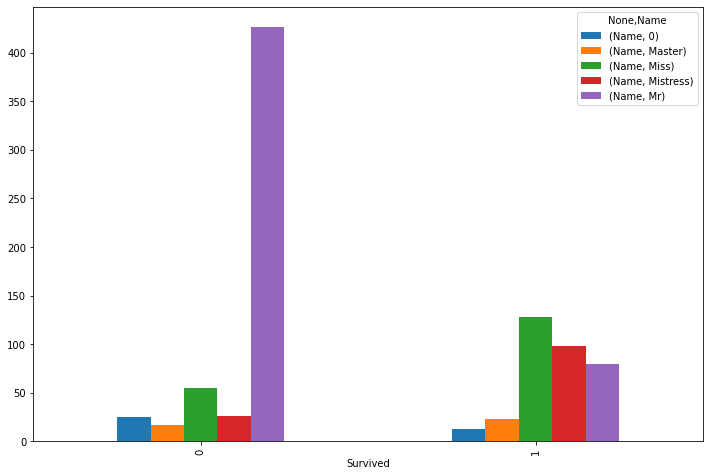

In [8]:
# Plot the distribution of titles into survide and dead categories 
def plot_distribution_titles(dataframe):
    """
    Plot the distribution of passengers based on their title

    Parameters:
    ----------
    dataframe: training dataset Titanic with the names modified to titles
    """
    data = dataframe.groupby(['Survived', 'Name'])[['Name']].count().unstack()
    data.plot.bar(figsize = (12, 8))
plot_distribution_titles(data)


### 3.2. Binning
* fares (custom)
* age (qbins)

In [9]:
# Fares
def fares(dataframe):
    """
    Hotecondes the fares into five different groups

    Parameters:
    ----------
    dataframe: training dataset Titanic
    """
    bins_fares = [-1, 7.92, 14.5, 32, 100, np.inf]
    names_fares = [0, 1, 2, 3, 4]
    dataframe['Fare_ranges'] = pd.cut(dataframe['Fare'], bins_fares,
                               labels = names_fares)
    dataframe['Fare_ranges'] = dataframe['Fare_ranges'].fillna(0) 

    return dataframe, bins_fares


In [10]:
data, bins_fares = fares(data)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Master,Miss,Mrs,Mr,uncommon,Fare_ranges
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,1,0
1,2,1,1,Mistress,female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,1,0,3
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,0,0,1


In [11]:
def ages(dataframe):
    """
    Hotencodes ages into four different groups using pandas qbins function

    Parameters:
    ----------
    dataframe: training dataset Titanic
    """
    dataframe['Age'] = dataframe['Age'].fillna(dataframe['Age'].mean())
    qbins = pd.qcut(dataframe['Age'], q = 4)
    qbins = pd.get_dummies(qbins)
    qbins.columns = ['qbin_Age1', 'qbin_Age2', 'qbin_Age3', 'qbin_Age4']
    dataframe = pd.concat([dataframe, qbins], axis =1)
    return dataframe

In [12]:
data = ages(data)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Master,Miss,Mrs,Mr,uncommon,Fare_ranges,qbin_Age1,qbin_Age2,qbin_Age3,qbin_Age4
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,1,0,0,0
1,2,1,1,Mistress,female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,3,0,0,0,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,1,0,1,0,0


### 3.3. Scalling
**Not my favorite**. It seems that digregating the scores in different columns helps to increase the accuracy. 

### 3.4. Into numeric
* sex

In [13]:
def gender(dataframe):
    """
    Hotencodes gender to either male or female

    Parameters:
    ----------
    dataframe: training dataset Titanic
    """
    dataframe.loc[(dataframe['Sex'] == 'male'), 'Sex'] = 0
    dataframe.loc[(dataframe['Sex'] == 'female'), 'Sex'] = 1
    dataframe["Sex"] = dataframe["Sex"].astype(str).astype(int)
    return dataframe

In [14]:
data = gender(data)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Master,Miss,Mrs,Mr,uncommon,Fare_ranges,qbin_Age1,qbin_Age2,qbin_Age3,qbin_Age4
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,1,0,0,0
1,2,1,1,Mistress,1,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,3,0,0,0,1
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,1,0,1,0,0


### 3.5. Interactions 
- Age per class

In [15]:
def age_per_class(dataframe, bins_fares):
    """
    Hotecondes ages per travelling class into five different groups

    Parameters:
    ----------
    dataframe: training dataset Titanic
    """
    dataframe['int_Age*Pclass'] = dataframe['Age'] * dataframe['Pclass']
    qbins = pd.qcut(dataframe['int_Age*Pclass'], q=4)
    qbins = pd.get_dummies(qbins)
    qbins.columns=['qbin_SexClass1', 'qbin_SexClass2', 'qbin_SexClass3', 'qbin_SexClass4']
    dataframe = pd.concat([dataframe, qbins], axis = 1)
    bins_Ages = [-1, 22, 29, 35, 60, np.inf]
    names_fares = [1, 2, 3, 4, 5]
    dataframe['Age_ranges'] =  pd.cut(dataframe['Age'], bins_fares, labels=names_fares)
    return dataframe

In [16]:
data = age_per_class(data, bins_fares)
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,qbin_Age1,qbin_Age2,qbin_Age3,qbin_Age4,int_Age*Pclass,qbin_SexClass1,qbin_SexClass2,qbin_SexClass3,qbin_SexClass4,Age_ranges
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,66.0,0,0,1,0,3
1,2,1,1,Mistress,1,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,38.0,1,0,0,0,4
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,78.0,0,0,1,0,3


In [17]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          2
unk_Cabin         0
Cabin_A           0
Cabin_B           0
Cabin_C           0
Cabin_D           0
Cabin_E           0
Cabin_F           0
Cabin_G           0
Cabin_T           0
Master            0
Miss              0
Mrs               0
Mr                0
uncommon          0
Fare_ranges       0
qbin_Age1         0
qbin_Age2         0
qbin_Age3         0
qbin_Age4         0
int_Age*Pclass    0
qbin_SexClass1    0
qbin_SexClass2    0
qbin_SexClass3    0
qbin_SexClass4    0
Age_ranges        0
dtype: int64

#### Remove columns not to be engineered and save to file

In [18]:
def clear_engineer(dataframe, columns_drop, data_type):
    """
    clear dataframe for a list containing the name of columns that will not be
    used as classifiers for the evaluation and prediction

    Parameters:
    ----------
    dataframe: Data from the Titanic dataset. Either training or test data
    data_type: training, test
    """
    if data_type == "training":
        dataframe.drop(columns_drop, axis = 1, inplace = True)
        dataframe.to_csv('../data/train_featured.csv', index=False)
    else:
        columns_drop = [value for value in columns_drop if value != "Cabin_T"]
        columns_drop += ["PassengerId"]
        dataframe.drop(columns_drop, axis = 1, inplace = True)
        dataframe.to_csv('../data/test_featured.csv', index=False)
    return dataframe

In [19]:
columns_drop = ['Age', 'Name', 'Fare',  'Ticket', 'Cabin', 'Embarked', 'int_Age*Pclass', "Cabin_T"]
data = clear_engineer(data, columns_drop, "training")
data.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,unk_Cabin,Cabin_A,Cabin_B,Cabin_C,...,Fare_ranges,qbin_Age1,qbin_Age2,qbin_Age3,qbin_Age4,qbin_SexClass1,qbin_SexClass2,qbin_SexClass3,qbin_SexClass4,Age_ranges
0,1,0,3,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,3
1,2,1,1,1,1,0,0,0,0,1,...,3,0,0,0,1,1,0,0,0,4
2,3,1,3,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,3


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Sex             891 non-null    int64   
 4   SibSp           891 non-null    int64   
 5   Parch           891 non-null    int64   
 6   unk_Cabin       891 non-null    uint8   
 7   Cabin_A         891 non-null    uint8   
 8   Cabin_B         891 non-null    uint8   
 9   Cabin_C         891 non-null    uint8   
 10  Cabin_D         891 non-null    uint8   
 11  Cabin_E         891 non-null    uint8   
 12  Cabin_F         891 non-null    uint8   
 13  Cabin_G         891 non-null    uint8   
 14  Master          891 non-null    uint8   
 15  Miss            891 non-null    uint8   
 16  Mrs             891 non-null    uint8   
 17  Mr              

In [21]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'unk_Cabin', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Master', 'Miss', 'Mrs', 'Mr', 'uncommon',
       'Fare_ranges', 'qbin_Age1', 'qbin_Age2', 'qbin_Age3', 'qbin_Age4',
       'qbin_SexClass1', 'qbin_SexClass2', 'qbin_SexClass3', 'qbin_SexClass4',
       'Age_ranges'],
      dtype='object')

## `Step 4 Evaluating Classifiers`

- Strategy definition
- Accuracy
- Precision
- Recall
- F1 scores

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

### Split the data into train and test set

In [23]:
data = pd.read_csv("../data/train_featured.csv")
y = data['Survived']
X = data.iloc[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Define the strategy to proceed with the evaluation

In [24]:
def define_strategy(X_train, y_train):
    plt = matplotlib.pyplot.gcf()
    plt.set_size_inches(12, 8)
    strats = ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']
    train_dummy_scores = {}
    
    for clfs in strats:
        if clfs == 'constant':
            dummy_clf = DummyClassifier(strategy = clfs, random_state = 0, constant = 0)
        else: 
            dummy_clf = DummyClassifier(strategy = clfs, random_state = 0)
        dummy_clf.fit(X_train, y_train)
        score = dummy_clf.score(X_train, y_train)
        train_dummy_scores[clfs] = score

    values = list(train_dummy_scores.values())
    ax = sns.stripplot(strats, values); 
    ax.set(xlabel ='strategy', ylabel ='training score')
    plt.savefig('../plots/strategies.jpg')

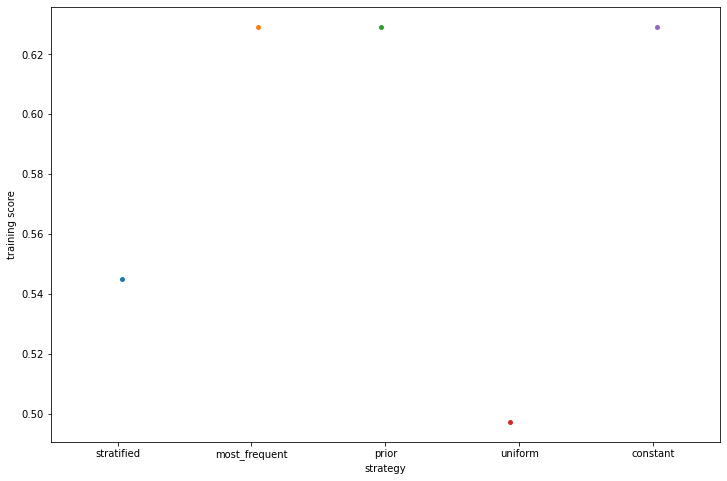

In [25]:
define_strategy(X_train, y_train)

### Build up a dummy classifier based on the prior. This will be of use for contrasting the model. 

In [26]:
def build_dummy():
    dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 0)
    dummy_clf.fit(X_train, y_train)
    dummy_clf.score(X_train, y_train)
    return dummy_clf

In [27]:
dummy_clf = build_dummy()

### Build simple logistic regression model

In [28]:
def simple_regression(training_cols):
    model = LogisticRegression(C=0.1, max_iter = 1000)
    model.fit(X_train[training_cols], y_train)
    score = model.score(X_train[training_cols], y_train)
    model.predict(X_train[training_cols]) 
    coef = model.coef_
    intercept = model.intercept_
    return coef, intercept, score, model

In [29]:
columns = [ 'Mrs', 'Miss', 'Age_ranges', 'Pclass', 'Sex', 'SibSp', 'qbin_Age2', 'Parch', 'Cabin_C']
coef, intercept, score, model = simple_regression(columns)
print("Simple regression results:\nscore: " + str(score), \
      "\ncoef: " + str(coef), "\nintercept: " + str(intercept))

Simple regression results:
score: 0.8188202247191011 
coef: [[ 0.15433901  0.69456175 -0.49716909 -0.88413099  1.89261143 -0.24252844
  -0.12709231 -0.01989933 -0.03336873]] 
intercept: [2.41960303]


### Calculate the accuracy of the build model 

In [30]:
def accuracy(X_train, training_cols):
    y_pred_dummy = dummy_clf.predict(X_train)
    y_pred_lr = model.predict(X_train[training_cols])
    accuracy = accuracy_score(y_train, y_pred_lr)    
    return accuracy, y_pred_lr

In [31]:
accuracy, y_pred_lr = accuracy(X_train, columns)
accuracy

0.8188202247191011

In [32]:
coef, intercept

(array([[ 0.15433901,  0.69456175, -0.49716909, -0.88413099,  1.89261143,
         -0.24252844, -0.12709231, -0.01989933, -0.03336873]]),
 array([2.41960303]))

### Check the types of Errors and the Confusion Matrix

In [33]:
def confusion_matrix_(model, training_cols, X_train, y_train): 
    titles_options = [("without_normalization", None),
                      ("Normalized", 'true')]
    class_names = training_cols
    for i in range(0, 2):
        titles = titles_options[i]
        if i == 0: 
            disp = plot_confusion_matrix(model, X_train[columns], y_train, 
                                         cmap=plt.cm.Blues,
                                         normalize=None)
        else: 
            disp = plot_confusion_matrix(model, X_train[columns], y_train, 
                                 cmap=plt.cm.Blues,
                                 normalize='true')    
        name = (titles_options[i][0], "confussion_matrix")
        name = "_".join(name) 
        disp.ax_.set_title(name)
        print(name)
        print(disp.confusion_matrix)
        plt.savefig('../plots/'+name, format ="jpg")

without_normalization_confussion_matrix
[[409  39]
 [ 90 174]]
Normalized_confussion_matrix
[[0.91294643 0.08705357]
 [0.34090909 0.65909091]]


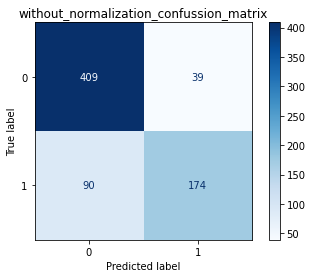

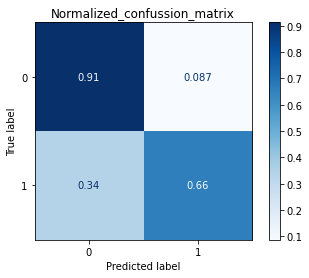

In [34]:
confusion_matrix_(model, columns, X_train, y_train)

### Calculate the precision (positive predictive value) and recall (sensitivity) of the model

In [35]:
def precision_recall(y_train, y_pred_lr): 
    precision = precision_score(y_train, y_pred_lr)
    recall = recall_score(y_train, y_pred_lr)
    return precision, recall

In [36]:
precision, recall = precision_recall(y_train, y_pred_lr)
precision, recall

(0.8169014084507042, 0.6590909090909091)

### Calculate the F1 score (harmonic mean of precision and recall) as a measure of a test's accuracy

In [37]:
F1 = 2 * (precision*recall)/(precision+recall)
F1

0.729559748427673

## `Step 5: Evaluating the logistic Regression model using Cross - validation`

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
cross_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

In [40]:
cross_scores

array([0.81118881, 0.81818182, 0.73943662, 0.86619718, 0.83098592])

In [41]:
cross_scores.mean().round(3), cross_scores.std()

(0.813, 0.04146067980891532)

## `Step 6. Use other Machine learning Methods to predict survival and dead accuracy`

__Machine learning classifying models: Classifiers__
- Logistic Regression
- Random Forest
- K Neighbors
- C-Support Vector
- Gradient Boosting
- Linear Discriminant Analysis



In [42]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Get an overview of several models at once 

In [43]:
def cross_validation_models(X_train, y_train, splits):
    random_state = 42
    cross_val_results = [] 
    cross_val_means = [] 
    cross_val_std = [] 
    models = [] 
    K_fold = StratifiedKFold(n_splits=splits)
    models.append(LogisticRegression(random_state = random_state))
    models.append(RandomForestClassifier(random_state=random_state))
    models.append(KNeighborsClassifier())
    models.append(SVC(random_state=random_state))
    models.append(GradientBoostingClassifier(random_state=random_state))
    models.append(LinearDiscriminantAnalysis())
    for i in models :
        cross_val_results.append(cross_val_score(i, X_train, y_train, 
                                          scoring = "accuracy", 
                                                 cv = K_fold, n_jobs=5))
    for results in cross_val_results:
        cross_val_means.append(results.mean())
        cross_val_std.append(results.std())
    cross_val_df = pd.DataFrame(
        {"Cross_Val_Means":cross_val_means,
         "Cross_Val_Errors": cross_val_std,
         "Algorithms":[
             "Logistic_Regression", "Random_Forest",
             "K_Neighbors", "SVC", "Gradient_Boosting", 
             "LinearDiscriminantAnalysis"
            ]
        })
    plt.figure(figsize=(6, 9))
    cross_val_plot = sns.barplot("Cross_Val_Means", "Algorithms", data = cross_val_df,
                    palette="colorblind", orient = "h", **{'xerr':cross_val_std})
    cross_val_plot.set_xlabel("Accuracy (mean)")
    cross_val_plot = cross_val_plot.set_title("Cross validation scores")
    plt.savefig('../plots/Cross_val_algorithms.jpg', format ="jpg", bbox_inches = 'tight')
    return cross_val_df

,Cross_Val_Means,Cross_Val_Errors,Algorithms
0,0.837080,0.001848,Logistic_Regression
1,0.837062,0.008947,Random_Forest
2,0.824416,0.014174,K_Neighbors
3,0.831460,0.010341,SVC
4,0.844083,0.010582,Gradient_Boosting
5,0.839887,0.006898,LinearDiscriminantAnalysis


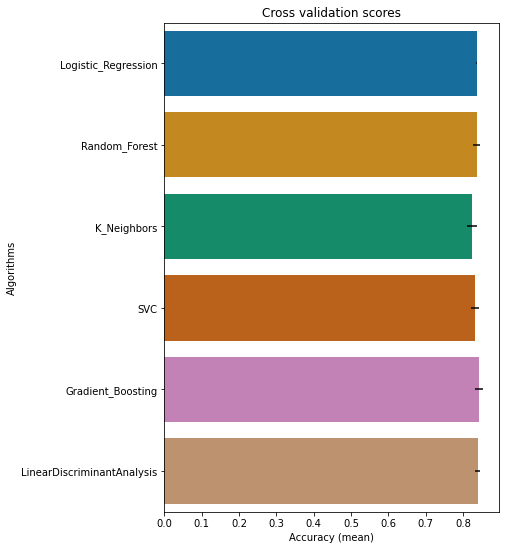

In [44]:
cross_val_df = cross_validation_models(X_train, y_train, 3)
cross_val_df

## `Step 7: Hyperparameter Optimization`

#### 7.1. __Fine tuning the Logistic Regression classifier model__

In [121]:
def hyper_opt_logistic(X_train, y_train, splits):
    K_fold = StratifiedKFold(n_splits = splits)
    LR_model = LogisticRegression()
    lR_parameters = {
        "penalty" : ["l2"],
        "C" :[0.01, 0.1, 1, 10, 100],
        "intercept_scaling": [1, 2, 3, 4],
        "tol" : [0.0001,0.0002,0.0003],
        "max_iter": [100,200,300],
        "solver":['liblinear'],
        "verbose":[1]
    }
    grid_LR_model = GridSearchCV(LR_model, param_grid = lR_parameters, cv=K_fold,
                         scoring="accuracy", n_jobs= 5, verbose = 1)
    grid_LR_model.fit(X_train, y_train)
    LR_model_best = grid_LR_model.best_estimator_
    best_score_LR = grid_LR_model.best_score_
    return best_score_LR, LR_model_best

In [122]:
best_score_LR, LR_model_best = hyper_opt_logistic(X_train, y_train, 3)
best_score_LR, LR_model_best

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  50 tasks      | elapsed:    1.5s


[LibLinear]

[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    3.2s finished


(0.8019891500904159, LogisticRegression(C=10, solver='liblinear', verbose=1))

#### 7.2. __Fine tuning the Random Forest classifier model__

In [123]:
def hyper_opt_RanForest(X_train, y_train, splits):
    K_fold = StratifiedKFold(n_splits = splits)
    RF_model = RandomForestClassifier()
    rf_parameters = {
        "max_depth": [3, 6, 9, 12, None],
        "min_samples_split": [2, 6, 20],
        "min_samples_leaf": [1, 4, 16],
        "n_estimators" :[100,200,300,400],
        "criterion": ["gini"]
        }
    grid_RF = GridSearchCV(RF_model, param_grid = rf_parameters, cv=K_fold,
                         scoring="accuracy", n_jobs= 5, verbose = 1)

    grid_RF.fit(X_train, y_train)
    RF_model_best = grid_RF.best_estimator_
    best_score_RF = grid_RF.best_score_
    return best_score_RF, RF_model_best

In [124]:
best_score_RF, RF_model_best = hyper_opt_RanForest(X_train, y_train, 3)
best_score_RF, RF_model_best

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   30.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:  1.5min finished


(0.8160243000153647, RandomForestClassifier(max_depth=9, n_estimators=300))

#### 7.3. __Fine tuning the K Neighbors classifier model__

In [125]:
def hyper_opt_KNN(X_train, y_train, splits):
    K_fold = StratifiedKFold(n_splits = splits)
    KNN_model = KNeighborsClassifier()#Use GridSearch

    KNN_parameters = {
        "leaf_size" : list(range(1,50)),
        "n_neighbors" : list(range(1,30)),
        "p" : [1,2]    
    }

    grid_KNN_model = GridSearchCV(KNN_model, 
                                  param_grid = KNN_parameters, 
                                  cv=K_fold,  
                                  scoring="accuracy", 
                                  n_jobs= 5, 
                                  verbose = 1
                                 )
    grid_KNN_model.fit(X_train, y_train)
    KNN_model_best = grid_KNN_model.best_estimator_
    best_score_KNN = grid_KNN_model.best_score_
    return best_score_KNN, KNN_model_best

In [126]:
best_score_KNN, KNN_model_best = hyper_opt_KNN(X_train, y_train, 3)
best_score_KNN, KNN_model_best

Fitting 3 folds for each of 2842 candidates, totalling 8526 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:   10.6s
[Parallel(n_jobs=5)]: Done 1710 tasks      | elapsed:   20.9s
[Parallel(n_jobs=5)]: Done 3110 tasks      | elapsed:   33.6s
[Parallel(n_jobs=5)]: Done 4910 tasks      | elapsed:   48.2s
[Parallel(n_jobs=5)]: Done 7110 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 8526 out of 8526 | elapsed:  1.3min finished


(0.813181812809512, KNeighborsClassifier(leaf_size=2, n_neighbors=16, p=1))

#### 7.4. __Fine tuning the C. Suport Vector model__

In [127]:
def hyper_opt_SVMC(X_train, y_train, splits):
    K_fold = StratifiedKFold(n_splits = splits)
    SVMC_model = SVC(probability=True)
    svmc_parameters = {
        'C': [1, 10, 50, 100, 200, 300], 
        'kernel': ['rbf'], 
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
    }

    grid_SVMC_model = GridSearchCV(SVMC_model, param_grid = svmc_parameters, cv = K_fold,
                          scoring="accuracy", n_jobs= -1, verbose = 1)

    grid_SVMC_model.fit(X_train,y_train)
    SVMC_model_best = grid_SVMC_model.best_estimator_
    best_score_SVMC = grid_SVMC_model.best_score_
    return best_score_SVMC, SVMC_model_best

In [128]:
best_score_SVMC, SVMC_model_best = hyper_opt_SVMC(X_train, y_train, 3)
best_score_SVMC, SVMC_model_best

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  83 out of  90 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.1s finished


(0.8244512995071447, SVC(C=10, gamma=0.01, probability=True))

#### 7.5. __Fine tuning the Gradient Boosting classifier__

In [129]:
def hyper_opt_GBC(X_train, y_train, splits):
    K_fold = StratifiedKFold(n_splits = splits)
    GB_model = GradientBoostingClassifier()
    GB_parameters = {
                  'loss' : ["deviance"],
                  'n_estimators' : [100,200,300],
                  'learning_rate': [0.1, 0.05, 0.01, 0.001],
                  'max_depth': [4, 8,16],
                  'min_samples_leaf': [100,150,250],
                  'max_features': [0.3, 0.1]
                  }
    gridGB_model = GridSearchCV(GB_model, param_grid = GB_parameters, cv=K_fold, 
                         scoring="accuracy", n_jobs= 5, verbose = 1)

    gridGB_model.fit(X_train,y_train)
    GB_model_best = gridGB_model.best_estimator_
    best_score_GBC = gridGB_model.best_score_
    return best_score_GBC, GB_model_best

In [130]:
best_score_GBC, GB_model_best = hyper_opt_GBC(X_train, y_train, 3)
best_score_GBC, GB_model_best

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:   12.9s
[Parallel(n_jobs=5)]: Done 639 out of 648 | elapsed:   21.9s remaining:    0.3s
[Parallel(n_jobs=5)]: Done 648 out of 648 | elapsed:   22.1s finished


(0.792155680837736,
 GradientBoostingClassifier(max_depth=16, max_features=0.1, min_samples_leaf=100,
                            n_estimators=300))

#### 7.6. __Fine tuning the Linear Discriminant Analysis__

In [131]:
def hyper_opt_LDA(X_train, y_train, splits):
    K_fold = StratifiedKFold(n_splits = splits)
    LDA_model= LinearDiscriminantAnalysis()
    lda_parameters= {"solver" : ["svd"],
                  "tol" : [0.0001,0.0002,0.0003]}

    grid_LDA_model = GridSearchCV(LDA_model, param_grid = lda_parameters, cv=K_fold,
                         scoring="accuracy", n_jobs= 5, verbose = 1)

    grid_LDA_model.fit(X_train,y_train)
    LDA_model_best = grid_LDA_model.best_estimator_
    best_score_LDA = grid_LDA_model.best_score_
    return best_score_LDA, LDA_model_best

In [132]:
best_score_LDA, LDA_model_best = hyper_opt_LDA(X_train, y_train, 3)
best_score_LDA, LDA_model_best

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 out of   9 | elapsed:    0.0s finished


(0.8146001016440332, LinearDiscriminantAnalysis())

#### 7.7. Create a function for the hyperparameter optimization for all

In [133]:
def general_hyper(X_train, y_train, splits):
    best_LR, LR_mbest = hyper_opt_logistic(X_train, y_train, splits)
    best_RF, RF_mbest = hyper_opt_RanForest(X_train, y_train, splits)
    best_KNN, KNN_mbest = hyper_opt_KNN(X_train, y_train, splits)
    best_SVMC, SVMC_mbest = hyper_opt_SVMC(X_train, y_train, splits)
    best_GBC, GBC_mbest = hyper_opt_GBC(X_train, y_train, splits)
    best_LDA, LDA_mbest = hyper_opt_LDA(X_train, y_train, splits)
    return best_LR, LR_mbest, best_RF, RF_mbest, best_KNN, KNN_mbest, \
           best_SVMC, SVMC_mbest, best_GBC, GBC_mbest, \
           best_LDA, LDA_mbest

In [134]:
LR_best, LR_model, RF_best, RF_model, KNN_best, KNN_model, \
SVMC_best, SVMC_model, GBC_best, GBC_model, LDA_best, \
LDA_model, = general_hyper(X_train, y_train, 3)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 900 out of 900 | elapsed:    3.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[LibLinear]Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    6.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   33.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Done 900 out of 900 | elapsed:  2.7min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 2842 candidates, totalling 14210 fits


[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    9.6s
[Parallel(n_jobs=5)]: Done 1710 tasks      | elapsed:   18.1s
[Parallel(n_jobs=5)]: Done 3110 tasks      | elapsed:   28.0s
[Parallel(n_jobs=5)]: Done 4910 tasks      | elapsed:   40.3s
[Parallel(n_jobs=5)]: Done 7110 tasks      | elapsed:   54.3s
[Parallel(n_jobs=5)]: Done 9710 tasks      | elapsed:  1.2min
[Parallel(n_jobs=5)]: Done 12710 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 14210 out of 14210 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 143 out of 150 | elapsed:    4.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 370 tasks      | elapsed:   14.4s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:   33.0s


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:   40.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.1s finished


In [135]:
LR_best, RF_best, KNN_best, SVMC_best, GBC_best, LDA_best
LR_model

LogisticRegression(C=1, intercept_scaling=3, solver='liblinear', verbose=1)

### How to explore the results from the grid search "GridSearchCV" ? 

In [136]:
def hyperparam_optimization(X_train, y_train, splits):
    K_fold = StratifiedKFold(n_splits = splits)
    model_rf = RandomForestClassifier(n_estimators = 100, max_depth = 3, \
                                      max_features = 3, min_samples_split = splits)
    rf_parameters = {
        "max_depth": [3, 6, 9, 12, None],
        "min_samples_split": [2, 6, 20],
        "min_samples_leaf": [1, 4, 16],
        "n_estimators" :[100,200,300,400],
        "criterion": ["gini"]
        }
    
    grid_RF = GridSearchCV(RF_model, param_grid = rf_parameters, cv=K_fold,
                         scoring="accuracy", n_jobs= 3, verbose = 1)
    grid_RF.fit(X_train, y_train)
    columns = ['mean_test_score', 'std_test_score', 'mean_fit_time', \
            'param_max_depth', 'param_n_estimators']
    results_gridcv = pd.DataFrame(grid_RF.cv_results_)
    results_gridcv[columns].sort_values('mean_test_score', ascending=False)
    random_forest = RandomForestClassifier(n_estimators=100, max_depth = 10,\
                                           max_features =3)
    random_forest.fit(X_train, y_train)
    y_prediction = random_forest.predict(X_train)
    random_forest.score(X_train, y_train)
    acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
    return results_gridcv, acc_random_forest, random_forest

In [137]:
gridcv_res, random_forest_res, rf_model = hyperparam_optimization(X_train, y_train, 3)
gridcv_res.head(10), random_forest_res,  rf_model

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    7.1s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   32.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done 540 out of 540 | elapsed:  1.5min finished


(   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0       0.186357      0.025108         0.016306        0.003147   
 1       0.385390      0.087101         0.029340        0.006658   
 2       0.572728      0.130995         0.040966        0.005262   
 3       0.652791      0.160474         0.055390        0.012330   
 4       0.192274      0.043354         0.015904        0.003263   
 5       0.380370      0.084822         0.028918        0.006057   
 6       0.569604      0.131347         0.042649        0.008684   
 7       0.638580      0.173072         0.046828        0.011728   
 8       0.192475      0.044576         0.015784        0.003290   
 9       0.381458      0.085223         0.029029        0.006347   
 
   param_criterion param_max_depth param_min_samples_leaf  \
 0            gini               3                      1   
 1            gini               3                      1   
 2            gini               3                      1   
 3    

### `Run the model on the TEST data`
__Using the Logistic Regression model__

In [138]:
LR_model.fit(X_train, y_train)
print('Logistic Regresion training score: ', LR_model.score(X_train, y_train).round(3))
print('Logistic Regresion test score    : ', LR_model.score(X_test, y_test).round(3))

[LibLinear]training score:  0.822
test score    :  0.832


__Using the Random Forest model__

In [139]:
RF_model.fit(X_train, y_train)
print('Random Forest training score: ', RF_model.score(X_train, y_train).round(3))
print('Random Forest test score    : ', RF_model.score(X_test, y_test).round(3))

training score:  0.892
test score    :  0.866


__Using the K neigbors model__

In [140]:
KNN_model.fit(X_train, y_train) 
print('K neigbors training score: ', KNN_model.score(X_train, y_train).round(3))
print('K neigbors test score    : ', KNN_model.score(X_test, y_test).round(3))

training score:  0.829
test score    :  0.827


__Using the SVM model__

In [141]:
SVMC_model.fit(X_train, y_train)
print('Support Vector Machine training score: ', SVMC_model.score(X_train, y_train).round(3))
print('Support Vector Machine test score: ', SVMC_model.score(X_test, y_test).round(3))

training score:  0.829
test score    :  0.844


__Using the Gradient Boosting model__

In [142]:
GBC_model.fit(X_train, y_train)
print('Gradient Boosting training score: ', GBC_model.score(X_train, y_train).round(3))
print('Gradient Boosting test score : ', GBC_model.score(X_test, y_test).round(3))

training score:  0.837
test score    :  0.81


__Using the Linear Discriminant Analysis model__

In [143]:
LDA_model.fit(X_train, y_train) 
print('Linear Discriminant Analysis  training score: ', LDA_model.score(X_train, y_train).round(3))
print('Linear Discriminant Analysis  test score: ', LDA_model.score(X_test, y_test).round(3))

training score:  0.826
test score    :  0.827


## `Step 7: Run the model on the TEST data from kaggle`
### Feature engineer the test data from kaggle (all in one function)

In [89]:
def engineer_test_kaggle(test_data, data_type):
    pred = test_data
    pred_ids = pred["PassengerId"]
    pred = cabin_names(pred, data_type)
    pred =  name_to_titles(pred)
    pred, pred_bins_fares = fares(pred)
    pred =  gender(pred)
    pred =  ages(pred)
    pred =  age_per_class(pred, pred_bins_fares)
    pred =  clear_engineer(pred, columns_drop, data_type)
    pred_ids.to_csv('../data/pred_ids.csv', index=False)
    return pred_ids

In [113]:
test_data  = pd.read_csv('../data/test.csv')
pred_ids = engineer_test_kaggle(test_data, "test")
test_data =  pd.read_csv("../data/test_featured.csv")

### Run the random forest model on the engineered data to make predictions

In [154]:
def run_test_data(pred, LR_model, RF_model, KNN_model, SVMC_model, \
                  GBC_model, LDA_model, pred_ids):
    y_pred_LR = LR_model.predict(pred)
    y_pred_RF = RF_model.predict(pred)
    y_pred_KNN = KNN_model.predict(pred)
    y_pred_SVMC = SVMC_model.predict(pred)
    y_pred_GBC = GBC_model.predict(pred)
    y_pred_LDA = LDA_model.predict(pred)
    y_pred_LR = pd.DataFrame({"PassengerId":pred_ids,  "Survived":y_pred_LR})
    y_pred_RF = pd.DataFrame({"PassengerId":pred_ids,  "Survived":y_pred_RF})
    y_pred_KNN = pd.DataFrame({"PassengerId":pred_ids,  "Survived":y_pred_KNN})
    y_pred_GBC = pd.DataFrame({"PassengerId":pred_ids,  "Survived":y_pred_GBC})
    y_pred_SVMC = pd.DataFrame({"PassengerId":pred_ids,  "Survived":y_pred_SVMC})
    y_pred_LDA = pd.DataFrame({"PassengerId":pred_ids,  "Survived":y_pred_LDA})
    y_pred_LR.to_csv('../data/' + "LR_kaggle.csv", index=False)
    y_pred_RF.to_csv('../data/' + "RF_kaggle.csv", index=False)
    y_pred_KNN.to_csv('../data/' + "KNN_kaggle.csv", index=False)
    y_pred_SVMC.to_csv('../data/' + "SVMC_kaggle.csv", index=False)
    y_pred_GBC.to_csv('../data/' + "GBC_kaggle.csv", index=False)
    y_pred_LDA.to_csv('../data/' + "LDA_kaggle.csv", index=False)

In [155]:
run_test_data(test_data, LR_model, RF_model, KNN_model, SVMC_model, \
                  GBC_model, LDA_model,  pred_ids)

##### The Kaggle score obtained using Random Forest was = 0.74

### What would happen if the first 8 features are used instead? Example for the Random Forest
__Answer:__ It is very likely that it will improve the cosnsitency betwween train and test

List of features and their relevance

In [146]:
relevance_features = pd.DataFrame(
    {"Feature": X_train.columns, "Relevance": RF_model.feature_importances_}
    ).sort_values(by="Relevance", ascending=False)
relevance_features.head(10)

,Feature,Relevance
1,Sex,0.183852
16,uncommon,0.141863
17,Fare_ranges,0.102180
0,Pclass,0.080293
2,SibSp,0.068526
15,Mr,0.063678
22,qbin_SexClass1,0.053147
4,unk_Cabin,0.040334
26,Age_ranges,0.038882
3,Parch,0.035448


In [147]:
def select_features(RF_model, X_train, X_test, features):
    relevance_features = pd.DataFrame({"Feature": X_train.columns, \
                        "Relevance": RF_model.feature_importances_}\
                                      ).sort_values(by="Relevance", \
                                                    ascending=False)
    best_ = relevance_features["Feature"].values[:int(features)]
    X_train = X_train[best_] 
    X_test = X_test[best_]
    return relevance_features, X_train, X_test, best_

In [148]:
relevance_features, X_train_2, X_test_2, best_ = select_features(RF_model, X_train, X_test, 8)
best_

array(['Sex', 'uncommon', 'Fare_ranges', 'Pclass', 'SibSp', 'Mr',
       'qbin_SexClass1', 'unk_Cabin'], dtype=object)

### Re-run the Random Forest classifier model with the selected features and check the training and test scores

In [149]:
gridcv_res, random_forest_res, RF_model2 = hyperparam_optimization(X_train_2, y_train, 5)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    6.6s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   31.7s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  2.3min
[Parallel(n_jobs=3)]: Done 900 out of 900 | elapsed:  2.6min finished


In [150]:
random_forest_res

87.08

In [151]:
print('training score: ', RF_model2.score(X_train_2, y_train).round(3))
print('test score    : ', RF_model2.score(X_test_2, y_test).round(3))

training score:  0.871
test score    :  0.816


In [ ]:
y_pred_RF2 = RF_model2.predict(pred)
y_pred_RF2 = pd.DataFrame({"PassengerId":pred_ids,  "Survived":y_pred_RF})
